In [17]:
# Setup
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from data_loader import PoetryLoader
from feature_extractor import PoetryFeatureExtractor
from analyzer import PoetryAnalyzer
from visualizer import PoetryVisualizer

print("✓ Modules imported successfully")

✓ Modules imported successfully


In [19]:
# Count ALL available poems in the corpus
print("COUNTING TOTAL POEMS IN RAW CORPUS")
print("="*60)

# Load ALL Tang poems (no limit)
print("\nLoading ALL Tang Dynasty poems...")
all_tang = analyzer.loader.load_tang_poems(max_poems=None)
print(f"✓ Total Tang poems available: {len(all_tang):,}")

# Load ALL Song ci poems (no limit)
print("\nLoading ALL Song Dynasty ci...")
all_song = analyzer.loader.load_song_ci(max_poems=None)
print(f"✓ Total Song ci available: {len(all_song):,}")

print("\n" + "="*60)
print(f"GRAND TOTAL: {len(all_tang) + len(all_song):,} poems")
print("="*60)


COUNTING TOTAL POEMS IN RAW CORPUS

Loading ALL Tang Dynasty poems...
✓ Total Tang poems available: 57,607

Loading ALL Song Dynasty ci...
✓ Total Song ci available: 21,053

GRAND TOTAL: 78,660 poems


## Full Corpus Analysis

Now analyzing ALL 57,607 Tang poems and 21,053 Song ci poems

In [28]:
# Process ALL Tang poems
print("PROCESSING ALL TANG POEMS")
print("="*60)
print(f"Extracting features from {len(all_tang):,} Tang poems...")
print("(This may take a few minutes...)")

tang_full = analyzer.process_corpus(all_tang)
print("✓ Tang corpus processing complete")

# Process ALL Song ci
print("\nPROCESSING ALL SONG CI")
print("="*60)
print(f"Extracting features from {len(all_song):,} Song ci...")

song_full = analyzer.process_corpus(all_song)
print("✓ Song corpus processing complete")

print("\n" + "="*60)
print("FULL CORPUS ANALYSIS COMPLETE")
print("="*60)

PROCESSING ALL TANG POEMS
Extracting features from 57,607 Tang poems...
(This may take a few minutes...)
✓ Tang corpus processing complete

PROCESSING ALL SONG CI
Extracting features from 21,053 Song ci...
✓ Tang corpus processing complete

PROCESSING ALL SONG CI
Extracting features from 21,053 Song ci...
✓ Song corpus processing complete

FULL CORPUS ANALYSIS COMPLETE
✓ Song corpus processing complete

FULL CORPUS ANALYSIS COMPLETE


In [29]:
# Comparative Statistics: Tang vs Song
print("\n" + "="*60)
print("COMPARATIVE ANALYSIS: TANG vs SONG")
print("="*60)

print("\nTANG DYNASTY POEMS:")
print(f"  Total poems: {len(tang_full):,}")
print(f"  Average lines per poem: {tang_full['line_count'].mean():.2f}")
print(f"  Average line length: {tang_full['avg_line_length'].mean():.2f}")
print(f"  Uniform line length: {tang_full['is_uniform_length'].sum()/len(tang_full)*100:.1f}%")

print("\nSONG DYNASTY CI:")
print(f"  Total poems: {len(song_full):,}")
print(f"  Average lines per poem: {song_full['line_count'].mean():.2f}")
print(f"  Average line length: {song_full['avg_line_length'].mean():.2f}")
print(f"  Uniform line length: {song_full['is_uniform_length'].sum()/len(song_full)*100:.1f}%")

# Form distributions
print("\n" + "="*60)
print("TANG POEM FORMS:")
tang_forms = tang_full['poem_form'].value_counts()
for form, count in tang_forms.head(10).items():
    print(f"  {form:20s}: {count:6,} ({count/len(tang_full)*100:5.1f}%)")

print("\nSONG CI FORMS:")
song_forms = song_full['poem_form'].value_counts()
for form, count in song_forms.head(10).items():
    print(f"  {form:20s}: {count:6,} ({count/len(song_full)*100:5.1f}%)")


COMPARATIVE ANALYSIS: TANG vs SONG

TANG DYNASTY POEMS:
  Total poems: 57,607
  Average lines per poem: 4.66
  Average line length: 11.74
  Uniform line length: 85.1%

SONG DYNASTY CI:
  Total poems: 21,053
  Average lines per poem: 7.56
  Average line length: 8.93
  Uniform line length: 4.1%

TANG POEM FORMS:
  other               : 21,892 ( 38.0%)
  wujue               : 14,500 ( 25.2%)
  irregular           :  8,570 ( 14.9%)
  qijue               :  8,000 ( 13.9%)
  wupai               :  2,952 (  5.1%)
  wulu                :  1,181 (  2.1%)
  qipai               :    362 (  0.6%)
  qilu                :    146 (  0.3%)
  unknown             :      4 (  0.0%)

SONG CI FORMS:
  irregular           : 20,185 ( 95.9%)
  other               :    539 (  2.6%)
  wujue               :    172 (  0.8%)
  qijue               :    144 (  0.7%)
  qilu                :     11 (  0.1%)
  wulu                :      2 (  0.0%)


In [30]:
# Save full corpus results
print("\nSAVING RESULTS...")
print("="*60)

# Save processed datasets
tang_full.to_csv('../data/tang_full_processed.csv', index=False)
print(f"✓ Saved {len(tang_full):,} Tang poems to ../data/tang_full_processed.csv")

song_full.to_csv('../data/song_full_processed.csv', index=False)
print(f"✓ Saved {len(song_full):,} Song ci to ../data/song_full_processed.csv")

# Save comprehensive summary
full_summary = {
    'tang': {
        'total_poems': len(tang_full),
        'avg_lines': float(tang_full['line_count'].mean()),
        'avg_line_length': float(tang_full['avg_line_length'].mean()),
        'uniform_length_pct': float(tang_full['is_uniform_length'].sum()/len(tang_full)*100),
        'form_distribution': tang_full['poem_form'].value_counts().head(20).to_dict()
    },
    'song': {
        'total_poems': len(song_full),
        'avg_lines': float(song_full['line_count'].mean()),
        'avg_line_length': float(song_full['avg_line_length'].mean()),
        'uniform_length_pct': float(song_full['is_uniform_length'].sum()/len(song_full)*100),
        'form_distribution': song_full['poem_form'].value_counts().head(20).to_dict()
    },
    'combined': {
        'total_poems': len(tang_full) + len(song_full)
    }
}

import json
with open('../output/full_corpus_summary.json', 'w', encoding='utf-8') as f:
    json.dump(full_summary, f, ensure_ascii=False, indent=2)

print("✓ Saved summary statistics to ../output/full_corpus_summary.json")
print("\n" + "="*60)
print("ALL DATA SAVED SUCCESSFULLY")
print("="*60)


SAVING RESULTS...
✓ Saved 57,607 Tang poems to ../data/tang_full_processed.csv
✓ Saved 21,053 Song ci to ../data/song_full_processed.csv
✓ Saved summary statistics to ../output/full_corpus_summary.json

ALL DATA SAVED SUCCESSFULLY
✓ Saved 57,607 Tang poems to ../data/tang_full_processed.csv
✓ Saved 21,053 Song ci to ../data/song_full_processed.csv
✓ Saved summary statistics to ../output/full_corpus_summary.json

ALL DATA SAVED SUCCESSFULLY


In [23]:
# DIAGNOSTIC: Investigate why poems aren't being classified correctly
print("DIAGNOSTIC: Investigating Classification Issues")
print("="*60)

# Look at some "irregular" and "other" poems to see what's happening
irregular_poems = tang_full[tang_full['poem_form'] == 'irregular'].head(10)
other_poems = tang_full[tang_full['poem_form'] == 'other'].head(10)

print("\nSample 'IRREGULAR' poems (different line lengths):")
print("-"*60)
for idx, row in irregular_poems.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Line count: {row['line_count']}")
    print(f"Line lengths: {row['line_lengths']}")
    print(f"Lines preview: {row['lines'][:3]}")
    if idx >= irregular_poems.index[2]:  # Show only 3 examples
        break

print("\n" + "="*60)
print("\nSample 'OTHER' poems (uniform length but not standard form):")
print("-"*60)
for idx, row in other_poems.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Line count: {row['line_count']}")
    print(f"Line lengths: {row['line_lengths']}")
    print(f"Avg line length: {row['avg_line_length']:.1f}")
    print(f"Lines preview: {row['lines'][:3]}")
    if idx >= other_poems.index[2]:  # Show only 3 examples
        break

# Check distribution of line counts and lengths
print("\n" + "="*60)
print("LINE COUNT DISTRIBUTION (all Tang poems):")
print(tang_full['line_count'].value_counts().head(15))

print("\n" + "="*60)
print("AVERAGE LINE LENGTH DISTRIBUTION (rounded):")
print(tang_full['avg_line_length'].round().value_counts().head(15))

DIAGNOSTIC: Investigating Classification Issues

Sample 'IRREGULAR' poems (different line lengths):
------------------------------------------------------------

Title: 幸武功慶善宮
Line count: 10
Line lengths: [10, 10, 10, 10, 10, 9, 10, 10, 10, 10]
Lines preview: ['壽丘惟舊跡，酆邑乃前基。', '粵予承累聖，懸弧亦在茲。', '弱齡逢運改，提劒鬱匡時。']

Title: 賜魏徵詩
Line count: 2
Line lengths: [9, 10]
Lines preview: ['醽醁勝蘭生，翠濤過玉䪥。', '千日醉不醒，十年味不敗。']

Title: 兩儀殿賦柏梁體
Line count: 3
Line lengths: [14, 14, 7]
Lines preview: ['絕域降附天下平，八表無事悅聖情。', '雲披霧斂天地明，登封日觀禪云亭。', '太常具禮方告成。']


Sample 'OTHER' poems (uniform length but not standard form):
------------------------------------------------------------

Title: 帝京篇十首 一
Line count: 4
Line lengths: [10, 10, 10, 10]
Avg line length: 10.0
Lines preview: ['秦川雄帝宅，函谷壯皇居。', '綺殿千尋起，離宮百雉餘。', '連甍遙接漢，飛觀迥凌虛。']

Title: 帝京篇十首 二
Line count: 4
Line lengths: [10, 10, 10, 10]
Avg line length: 10.0
Lines preview: ['巖廊罷機務，崇文聊駐輦。', '玉匣啓龍圖，金繩披鳳篆。', '韋編斷仍續，縹帙舒還卷。']

Title: 帝京篇十首 三
Line count: 4
Line lengths: [10, 10,

In [24]:
# Test the actual cleaning
from feature_extractor import PoetryFeatureExtractor

test_line = '秦川雄帝宅，函谷壯皇居。'
print(f"Original line: {test_line}")
print(f"Length with punctuation: {len(test_line)}")
print(f"Cleaned line: {PoetryFeatureExtractor.clean_line(test_line)}")
print(f"Cleaned length: {PoetryFeatureExtractor.get_line_length(test_line)}")

# The line "秦川雄帝宅，函谷壯皇居。" has:
# 秦川雄帝宅 = 5 chars
# ， = punctuation
# 函谷壯皇居 = 5 chars  
# 。 = punctuation
# So it's actually TWO 5-character phrases, total 10 Chinese characters

print("\nLet's check a proper 5-char line:")
test_line2 = '白日依山盡'
print(f"Line: {test_line2}")
print(f"Cleaned length: {PoetryFeatureExtractor.get_line_length(test_line2)}")

# Check what actual 4-line 5-char poem looks like
sample_4line = tang_full[tang_full['line_count'] == 4].iloc[0]
print(f"\nSample 4-line poem:")
print(f"Title: {sample_4line['title']}")
for i, line in enumerate(sample_4line['lines']):
    clean_len = PoetryFeatureExtractor.get_line_length(line)
    print(f"  Line {i+1}: {line[:30]:30s} -> {clean_len} chars")

Original line: 秦川雄帝宅，函谷壯皇居。
Length with punctuation: 12
Cleaned line: 秦川雄帝宅函谷壯皇居
Cleaned length: 10

Let's check a proper 5-char line:
Line: 白日依山盡
Cleaned length: 5

Sample 4-line poem:
Title: 帝京篇十首 一
  Line 1: 秦川雄帝宅，函谷壯皇居。                   -> 10 chars
  Line 2: 綺殿千尋起，離宮百雉餘。                   -> 10 chars
  Line 3: 連甍遙接漢，飛觀迥凌虛。                   -> 10 chars
  Line 4: 雲日隱層闕，風煙出綺疎。                   -> 10 chars


In [25]:
# Test the updated classifier
print("Testing updated classifier with double-hemistich formats:")
print("="*60)

# Reload the module to get the updated function
import importlib
import feature_extractor
importlib.reload(feature_extractor)
from feature_extractor import PoetryFeatureExtractor

# Test with sample poems
test_poems = [
    {
        'title': '4-line, 10-char (should be wujue)',
        'lines': ['秦川雄帝宅，函谷壯皇居。', '綺殿千尋起，離宮百雉餘。', 
                  '連甍遙接漢，飛觀迥凌虛。', '雲日隱層闕，風煙出綺疎。']
    },
    {
        'title': '4-line, 14-char (should be qijue)',
        'lines': ['a'*7 + '，' + 'b'*7 + '。'] * 4  # Simulated 14-char lines
    },
    {
        'title': '8-line, 10-char (should be wulu)',  
        'lines': ['x'*5 + '，' + 'y'*5 + '。'] * 8  # Simulated 10-char lines
    }
]

for poem in test_poems:
    form = PoetryFeatureExtractor.classify_poem_form(poem['lines'])
    lengths = PoetryFeatureExtractor.get_line_lengths(poem['lines'])
    print(f"\n{poem['title']}")
    print(f"  Line count: {len(poem['lines'])}")
    print(f"  Line lengths: {lengths[0]} chars x {len(poem['lines'])} lines")
    print(f"  Classification: {form}")

Testing updated classifier with double-hemistich formats:

4-line, 10-char (should be wujue)
  Line count: 4
  Line lengths: 10 chars x 4 lines
  Classification: wujue

4-line, 14-char (should be qijue)
  Line count: 4
  Line lengths: 0 chars x 4 lines
  Classification: other

8-line, 10-char (should be wulu)
  Line count: 8
  Line lengths: 0 chars x 8 lines
  Classification: other


## Re-process with Fixed Classifier

The classifier has been updated to recognize double-hemistich formats:
- 4 lines × 10 chars (5+5) = wujue 五言絕句
- 4 lines × 14 chars (7+7) = qijue 七言絕句  
- 8 lines × 10 chars (5+5) = wulu 五言律詩
- 8 lines × 14 chars (7+7) = qilu 七言律詩

In [26]:
# Re-process corpus with updated classifier
print("RE-PROCESSING CORPUS WITH FIXED CLASSIFIER")
print("="*60)

# Reinitialize analyzer with reloaded module
analyzer_new = PoetryAnalyzer()
analyzer_new.loader = PoetryLoader('../data/raw_corpus')

# Re-process Tang poems (using existing loaded data)
print(f"\nRe-extracting features from {len(all_tang):,} Tang poems...")
print("(This may take a few minutes...)")
tang_fixed = analyzer_new.process_corpus(all_tang)

print("\n✓ Tang corpus re-processing complete")
print("\nNEW FORM DISTRIBUTION:")
print("-"*60)
tang_fixed_forms = tang_fixed['poem_form'].value_counts()
for form, count in tang_fixed_forms.items():
    print(f"  {form:15s}: {count:6,} ({count/len(tang_fixed)*100:5.1f}%)")

RE-PROCESSING CORPUS WITH FIXED CLASSIFIER

Re-extracting features from 57,607 Tang poems...
(This may take a few minutes...)

✓ Tang corpus re-processing complete

NEW FORM DISTRIBUTION:
------------------------------------------------------------
  other          : 21,892 ( 38.0%)
  wujue          : 14,500 ( 25.2%)
  irregular      :  8,570 ( 14.9%)
  qijue          :  8,000 ( 13.9%)
  wupai          :  2,952 (  5.1%)
  wulu           :  1,181 (  2.1%)
  qipai          :    362 (  0.6%)
  qilu           :    146 (  0.3%)
  unknown        :      4 (  0.0%)

✓ Tang corpus re-processing complete

NEW FORM DISTRIBUTION:
------------------------------------------------------------
  other          : 21,892 ( 38.0%)
  wujue          : 14,500 ( 25.2%)
  irregular      :  8,570 ( 14.9%)
  qijue          :  8,000 ( 13.9%)
  wupai          :  2,952 (  5.1%)
  wulu           :  1,181 (  2.1%)
  qipai          :    362 (  0.6%)
  qilu           :    146 (  0.3%)
  unknown        :      4 (  0.0%

In [9]:
# Load Data
analyzer = PoetryAnalyzer()
# Fix the path - PoetryAnalyzer uses default 'data/raw_corpus' which is relative to project root
# When running from notebooks/, we need to go up one level
analyzer.loader = PoetryLoader('../data/raw_corpus')

viz = PoetryVisualizer(output_dir='../output')

# Load Tang poems (MVP: 500 poems)
print("Loading Tang Dynasty poems...")
tang_raw = analyzer.loader.load_tang_poems(max_poems=2000)
print(f"Loaded {len(tang_raw)} Tang poems")

# Display sample
tang_raw.head()


Loading Tang Dynasty poems...
Loaded 2000 Tang poems


,title,author,lines,dynasty
0,帝京篇十首 一,太宗皇帝,"[秦川雄帝宅，函谷壯皇居。, 綺殿千尋起，離宮百雉餘。, 連甍遙接漢，飛觀迥凌虛。, 雲日隱...",Tang
1,帝京篇十首 二,太宗皇帝,"[巖廊罷機務，崇文聊駐輦。, 玉匣啓龍圖，金繩披鳳篆。, 韋編斷仍續，縹帙舒還卷。, 對此乃...",Tang
2,帝京篇十首 三,太宗皇帝,"[移步出詞林，停輿欣武宴。, 琱弓寫明月，駿馬疑流電。, 驚雁落虛弦，啼猿悲急箭。, 閱賞誠...",Tang
3,帝京篇十首 四,太宗皇帝,"[鳴笳臨樂館，眺聽歡芳節。, 急管韻朱絃，清歌凝白雪。, 彩鳳肅來儀，玄鶴紛成列。, 去茲鄭...",Tang
4,帝京篇十首 五,太宗皇帝,"[芳辰追逸趣，禁苑信多奇。, 橋形通漢上，峰勢接雲危。, 煙霞交隱映，花鳥自參差。, 何如肆...",Tang


In [10]:
# Extract Features
print("Extracting features from corpus...")
tang_processed = analyzer.process_corpus(tang_raw)
print("✓ Feature extraction complete")

# Show feature columns
tang_processed.columns.tolist()

Extracting features from corpus...
✓ Feature extraction complete


['title',
 'author',
 'lines',
 'dynasty',
 'line_count',
 'line_lengths',
 'end_characters',
 'poem_form',
 'avg_line_length',
 'line_length_std',
 'line_length_variance',
 'is_uniform_length',
 'total_characters']

In [11]:
# Basic Statistics
print("CORPUS STATISTICS")
print("="*50)
print(f"Total poems: {len(tang_processed)}")
print(f"Average lines per poem: {tang_processed['line_count'].mean():.2f}")
print(f"Average line length: {tang_processed['avg_line_length'].mean():.2f}")
print(f"Poems with uniform line length: {tang_processed['is_uniform_length'].sum()} ({tang_processed['is_uniform_length'].sum()/len(tang_processed)*100:.1f}%)")

CORPUS STATISTICS
Total poems: 2000
Average lines per poem: 4.64
Average line length: 10.76
Poems with uniform line length: 1751 (87.5%)



POEM FORM DISTRIBUTION
other          : 1751 ( 87.5%)
irregular      :  249 ( 12.4%)


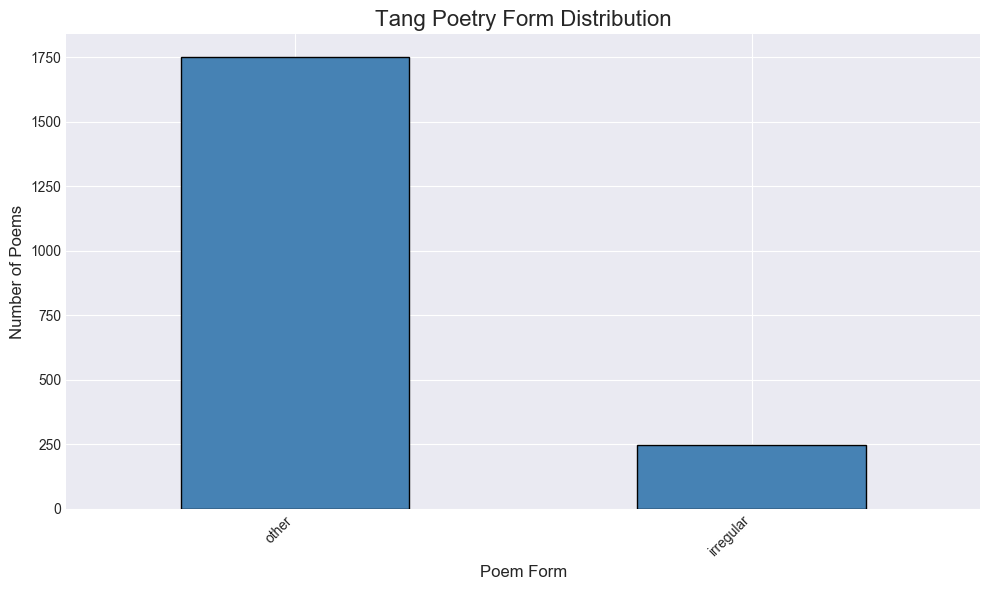

In [12]:
# Form Distribution
form_dist = tang_processed['poem_form'].value_counts()
print("\nPOEM FORM DISTRIBUTION")
print("="*50)
for form, count in form_dist.items():
    print(f"{form:15s}: {count:4d} ({count/len(tang_processed)*100:5.1f}%)")

viz.plot_form_distribution(tang_processed, title='Tang Poetry Form Distribution')

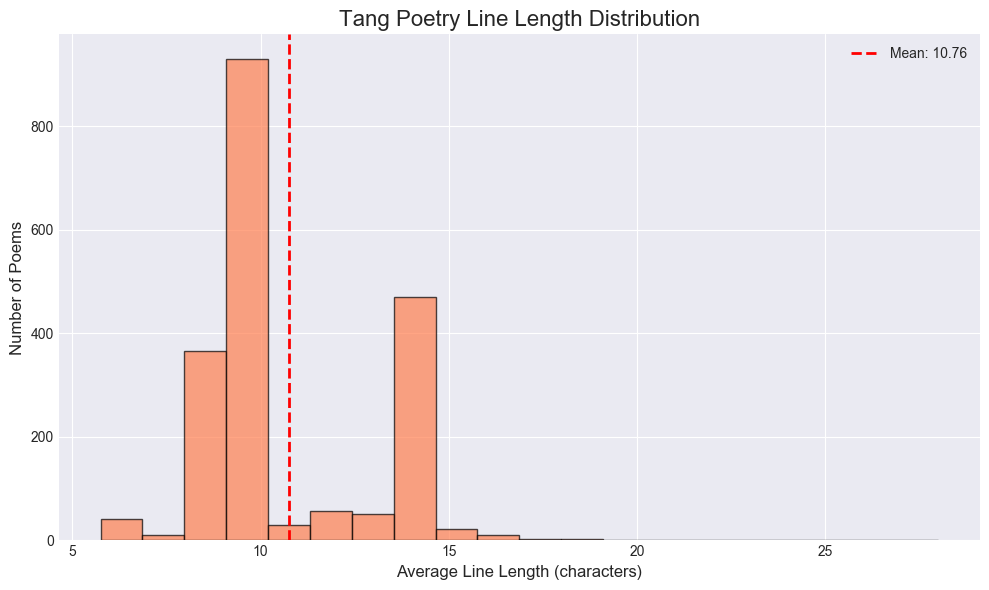

In [13]:
# Line Length Analysis
viz.plot_line_length_distribution(tang_processed, title='Tang Poetry Line Length Distribution')

ANALYZING END-LINE CHARACTERS
Total unique end characters: 1857

Top 20 most common:
  人: 98
  風: 77
  聲: 75
  春: 68
  中: 66
  光: 62
  生: 62
  歸: 62
  時: 56
  行: 56
  天: 56
  明: 55
  長: 53
  成: 50
  空: 48
  年: 48
  衣: 48
  情: 47
  城: 46
  新: 46


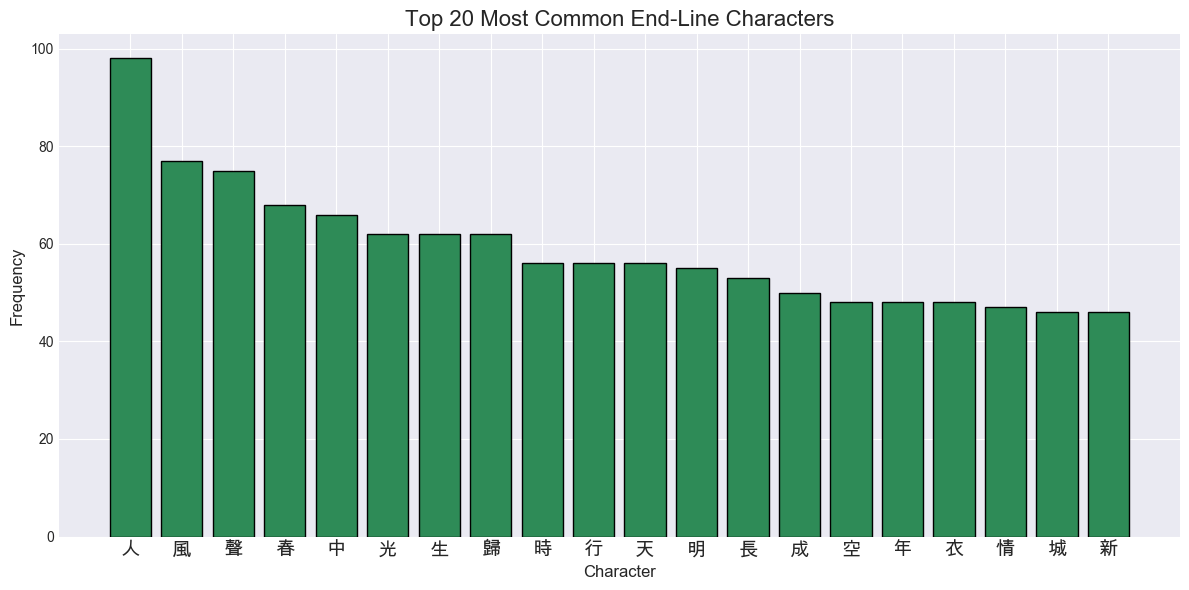

In [14]:
# End Character Analysis
print("ANALYZING END-LINE CHARACTERS")
print("="*50)

all_end_chars = []
for chars in tang_processed['end_characters']:
    all_end_chars.extend(chars)

end_char_counter = Counter(all_end_chars)
print(f"Total unique end characters: {len(end_char_counter)}")
print(f"\nTop 20 most common:")
for char, count in end_char_counter.most_common(20):
    print(f"  {char}: {count}")

viz.plot_end_character_frequency(end_char_counter, top_n=20)

In [15]:
# Save Results
# Save processed data
tang_processed.to_csv('../data/tang_processed_mvp.csv', index=False)
print("✓ Saved processed data to ../data/tang_processed_mvp.csv")

# Save summary statistics
summary = {
    'total_poems': len(tang_processed),
    'avg_lines': tang_processed['line_count'].mean(),
    'avg_line_length': tang_processed['avg_line_length'].mean(),
    'form_distribution': tang_processed['poem_form'].value_counts().to_dict(),
    'top_end_chars': dict(end_char_counter.most_common(20))
}

import json
with open('../output/tang_summary_stats.json', 'w', encoding='utf-8') as f:
    json.dump(summary, f, ensure_ascii=False, indent=2)

print("✓ Saved summary statistics to ../output/tang_summary_stats.json")

✓ Saved processed data to ../data/tang_processed_mvp.csv
✓ Saved summary statistics to ../output/tang_summary_stats.json
